# Part 1: Classification with Support Vector Machines (SVM)

In this mini-project, you will first use the SVM classifier (Support Vector Machines) with various artificial datasets (in part 1) to get familiar with it, then you will use SVM to build a Spam classifier (in part 2).

In this first part, you will be experimenting SVM with some artificial datasets to help you gain an intuition of how SVM work.

## Example Dataset 1
We will begin by with a dataset (file `"datasets/artificial_dataset1.csv"`) which can be separated by a linear boundary. The following Python code will load and plot the training data. Read it and try to understand it before you execute it.

In this dataset, the positions of the positive examples (indicated with class `1`) and the negative examples (indicated with class `0`) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example on the far left at about `(0.1, 4.1)`. As part of this exercise, you will also see how this outlier affects the SVM decision boundary.

X.shape: (51, 2) y.shape: (51,)


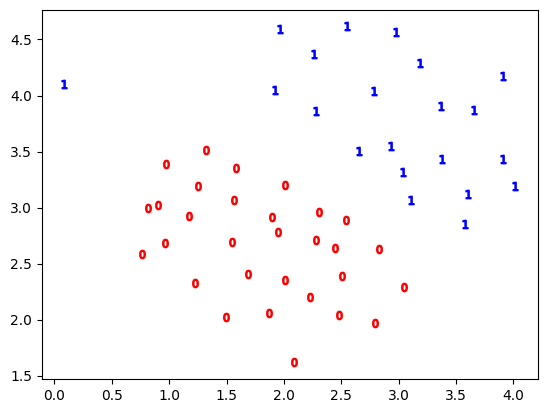

In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# Loading the dataset into X (inputs) and y (outputs)
df = pd.read_csv("datasets/artificial_dataset1.csv") # Load the data as a DataFrame from a CSV file.
X = df[["feature0", "feature1"]].values # Extract the input data as a 2-dimensional numpy array 
y = df["class"].values # Extract the output (labels) as a 1-dimensional numpy array.
print("X.shape:", X.shape, "y.shape:", y.shape)

X0 = X[y==0] # data-points where the class-label is 0
X1 = X[y==1] # data-points where the class-label is 1

plt.scatter(X0[:, 0], X0[:, 1], marker="$0$", color="red")
plt.scatter(X1[:, 0], X1[:, 1], marker="$1$", color="blue")
plt.show()

Here, you will try using different values of the hyperparameter $C$ with SVM. Informally, the $C$ hyperparameter is a positive value that controls the penalty for misclassified training examples. A large $C$ value tells the SVM to try to classify all the training examples correctly. In order to understand this, a function `svm_train_and_plot(X, y, C)` is provided to you (in the code below). This function trains an SVM model on the provided dataset `(X, y)` with the specified hyperparameter `C`. For now, you do **NOT** need to understand how this function works.

In the code below, your task is to call the function `svm_train_and_plot(X, y, C)` and try different values of $C$ on this dataset (e.g. try a least $C=1$, $C=10$, and $C=100$) and compare the results.

When $C = 1$, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the outlier data-point on the far left (see the left plot in the following figure). When $C = 100$, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data, i.e., it overfits (see the right plot in the following figure).

<img src="imgs/svmData1CLab5.png" width="800px" />

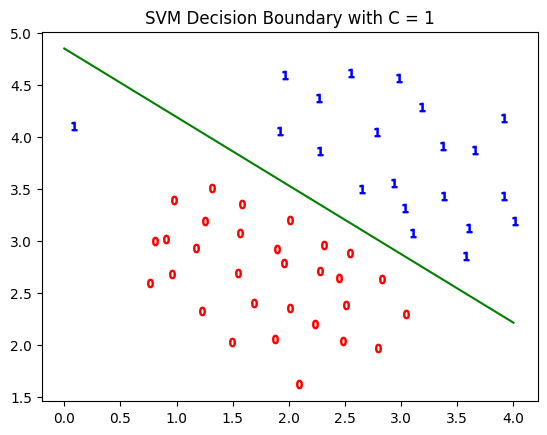

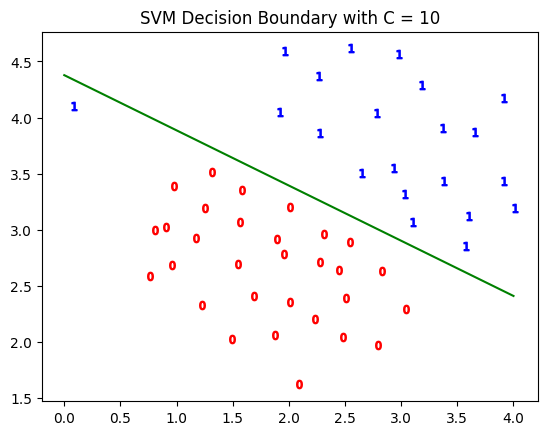

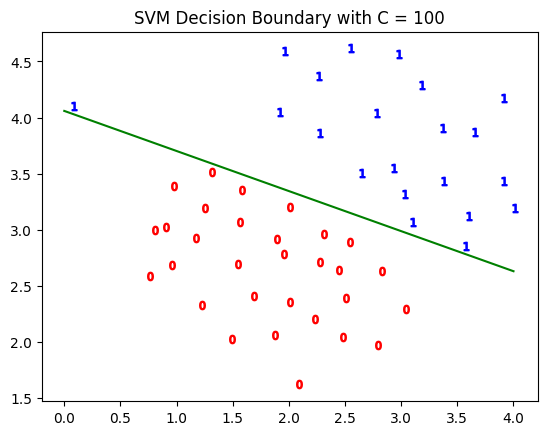

In [2]:
""" TODO:
Call the function svm_train_and_plot (that we imported below) with different 
values of C (e.g. 1, 10, 100) and compare the resulting plots.
"""

# Here, we import the function for you. It is defined within a directory called datasets, within a file called utils
from datasets.utils import svm_train_and_plot

# TODO: call it with C=1
svm_train_and_plot(X, y, 1)

# TODO: call it with C=10
svm_train_and_plot(X, y, 10)

# TODO: call it with C=100
svm_train_and_plot(X, y, 100)

In [ ]:
""" TODO: 
Based on the plots you got, explain here with a sentence or 
two (within this comment), which value of C (1, 10, or 100) you 
think led to a better decision boundary, and why?

YOUR EXPLANATION HERE ...
*** I believe that the better decision boundry is drawn when the value of C is equal to 1. This seems to be the most generally correct decision 
boundry for the given data just by looking at it. But since we dont have any test data or dont know how future data might look, 
it is really hard to say what is best in this case. ***
"""

pass

## Example Dataset 2
The following Python code will load another dataset from the file `"datasets/artificial_dataset2.csv"`. Read the code then run it to see the resulting figure.

From the figure, you can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, a nonlinear version of SVM (that requires more hyperparameters) can be used to produce nonlinear decision boundaries. This way, you will be able to learn a nonlinear decision boundary that can perform reasonably well for the dataset.

X.shape: (863, 2) y.shape: (863,)


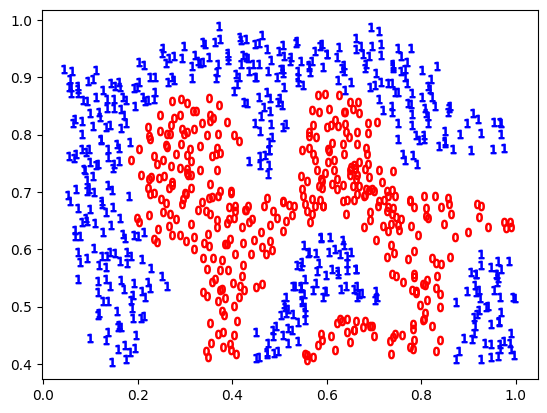

In [10]:
# The old (previous) variables X and y will be replaced with the new dataset.

df = pd.read_csv("datasets/artificial_dataset2.csv")
X = df[["feature0", "feature1"]].values
y = df["class"].values
print("X.shape:", X.shape, "y.shape:", y.shape)

X0 = X[y==0] # data-points where the class-label is 0
X1 = X[y==1] # data-points where the class-label is 1

""" TODO:
Produce a scatter plot of the data in X0 with a red color and with the marker $0$,
and a scatter plot of the data in X1 with a blue color, and with the marker $1$.
"""

plt.scatter(X0[:, 0], X0[:, 1], color="red", marker="$0$")
plt.scatter(X1[:, 0], X1[:, 1], color="blue", marker="$1$")
plt.show()

A function `nonlinear_svm_train_and_plot(X, y, C, sigma)` is provided to you. It trains a nonlinear SVM on the training dataset `X, y`, using the specified hyperparameters `C` and `gamma`. You do **NOT** need to understand how this function works. Just run the following code to see the result when the training is performed with `C=1` and `gamma=50`.

Please wait. This might take some time (few seconds) ...


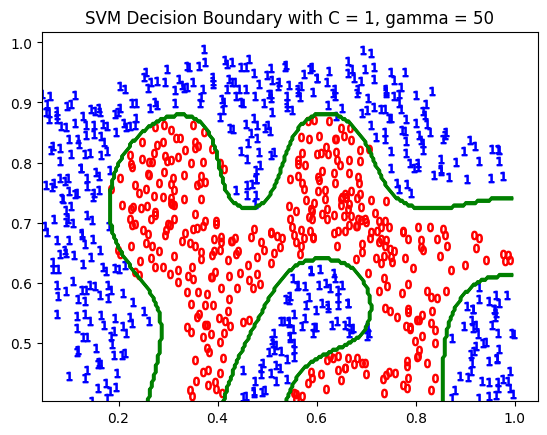

In [12]:
from datasets.utils import nonlinear_svm_train_and_plot

# We call here our function defined above, with C=1 and gamma = 50
nonlinear_svm_train_and_plot(X, y, C=1, gamma=50)

In the code below, your task is to call the function `nonlinear_svm_train_and_plot(X, y, C, gamma)` and try different values of `gamma` on this dataset, e.g. `gamma=5000`, `gamma=50`, and `gamma=2` (you can, of course, try other values as well if you want). You can keep the value of `C` to $1$.

Here is an example of what you should expect.

- When `gamma` is too large (e.g. `gamma=5000`), you can see that the decision boundary is very complex and is able to separate all of the positive and negative examples correctly, but it might not generalize well to new unseen data (i.e. **overfitting** occurs). 
- With `gamma=50`, the decision boundary is able to separate most of the positive and negative examples correctly and follows the contours of the dataset well. 
- When `gamma` is too large (e.g. `gamma=2`), then it might result in **underfitting**, as you can see from the following figure (the decision boundary is not able to separate the two classes well enough).

<img src="imgs/svmData2Gamma.png" />

Please wait. This might take some time (few seconds) ...


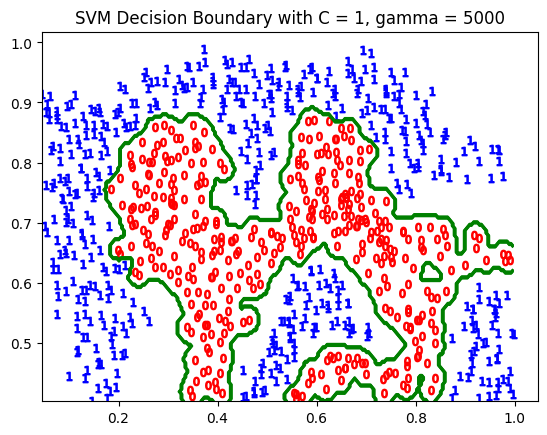

Please wait. This might take some time (few seconds) ...


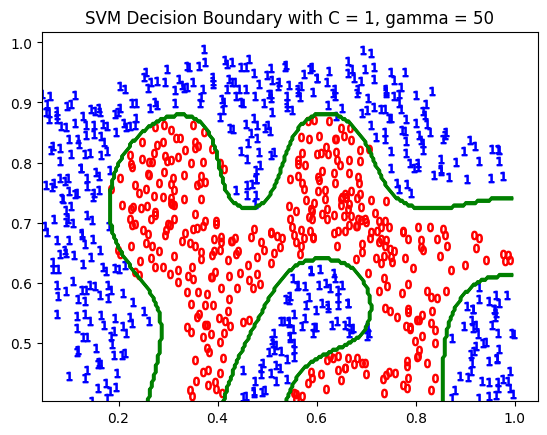

Please wait. This might take some time (few seconds) ...


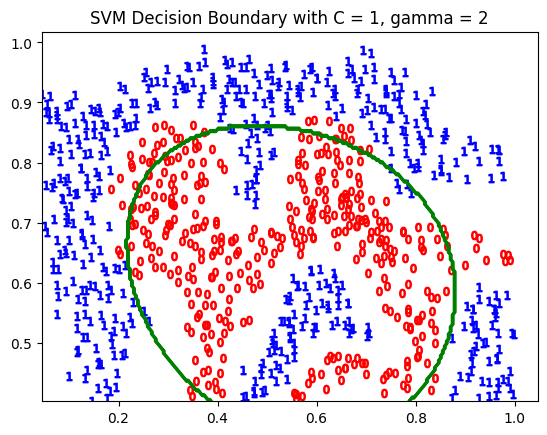

In [15]:
""" TODO:
Call nonlinear_svm_train_and_plot(X, y, C, sigma) with different values of sigma and compare the resulting plots.
"""
# TODO: call it with gamma=5000
nonlinear_svm_train_and_plot(X, y, C=1, gamma=5000)
# TODO: call it with gamma=50
nonlinear_svm_train_and_plot(X, y, C=1, gamma=50)
# TODO: call it with gamma=2
nonlinear_svm_train_and_plot(X, y, C=1, gamma=2)

Please wait. This might take some time (few seconds) ...


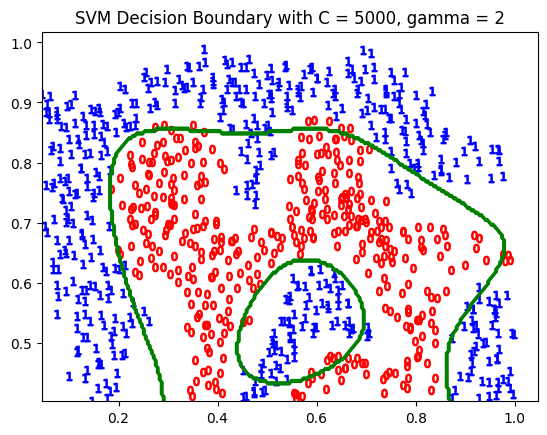

In [21]:
# TODO (optional) : you can also try different other combination of values for both C and gamma
nonlinear_svm_train_and_plot(X, y, C=5000, gamma=2)

Please wait. This might take some time (few seconds) ...


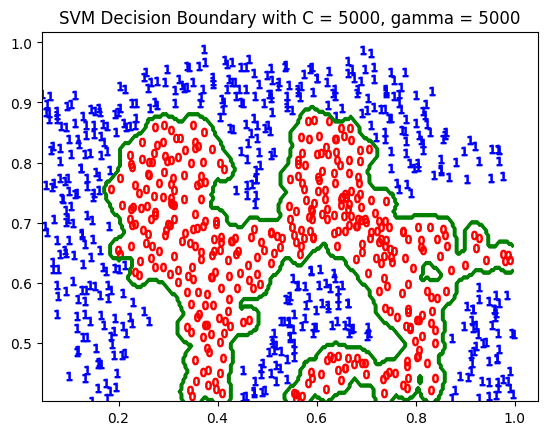

In [18]:
nonlinear_svm_train_and_plot(X, y, C=5000, gamma=5000)